In [44]:

from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from itertools import product
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

RSEED=42



In [45]:
df_tanzania=pd.read_csv("data/Train.csv")
variable_features=pd.read_csv("data/VariableDefinitions.csv")

In [46]:
variable_features

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [47]:
X = df_tanzania.drop(['total_cost','ID'],axis=1)
y = df_tanzania.total_cost

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [49]:
#X_test = test_features.drop('total_cost',axis=1)

#y_test = test_features.total_cost



In [50]:
df_tanzania.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [51]:
X_train.isnull().sum()

country                    0
age_group                  0
travel_with              833
total_female               1
total_male                 4
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          226
dtype: int64

In [52]:
df_tanzania.duplicated().sum()


0

In [53]:
df_tanzania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [54]:
unique_values = X_train.apply(lambda col: col.unique())
print('unique:',unique_values)

unique: country                  [SOUTH AFRICA, KENYA, POLAND, IRELAND, UNITED ...
age_group                                        [25-44, 1-24, 45-64, 65+]
travel_with              [nan, Spouse and Children, Spouse, Friends/Rel...
total_female             [0.0, 2.0, 1.0, 4.0, 6.0, 3.0, 7.0, 5.0, 10.0,...
total_male               [1.0, 2.0, 0.0, 3.0, 4.0, 5.0, 6.0, nan, 9.0, ...
purpose                  [Meetings and Conference, Leisure and Holidays...
main_activity            [Wildlife tourism, Beach tourism, Hunting tour...
info_source              [Friends, relatives, Radio, TV, Web, Travel, a...
tour_arrangement                               [Independent, Package Tour]
package_transport_int                                            [No, Yes]
package_accomodation                                             [No, Yes]
package_food                                                     [No, Yes]
package_transport_tz                                             [No, Yes]
package_sightseei

In [55]:
unique_values.to_csv('data/unique_Value_train_features.csv')

In [56]:
X_train.shape

(3606, 21)

In [57]:
X_train['total_female'].max()

49.0

In [58]:
X_train['total_female'].mean().round()

1.0

In [59]:
X_train['total_female'].fillna(round(X_train['total_female'].mean()), inplace=True)

In [60]:
X_train['total_female']
X_train['total_female'].isnull().sum()

0

In [61]:
X_train['total_male'].fillna(round(X_train['total_male'].mean()), inplace=True)
X_train['total_male'].isnull().sum()

0

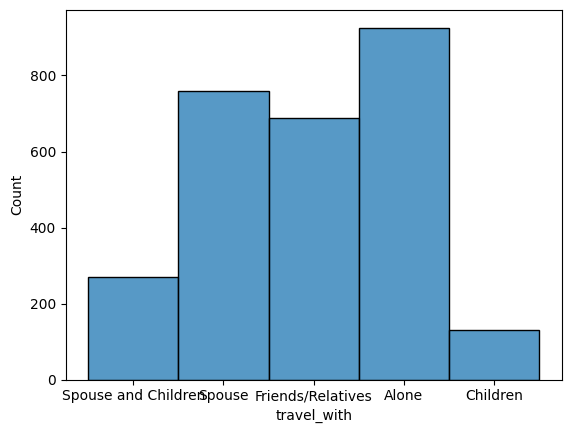

In [62]:
#travel_with
sns.histplot(X_train.travel_with)
plt.show()

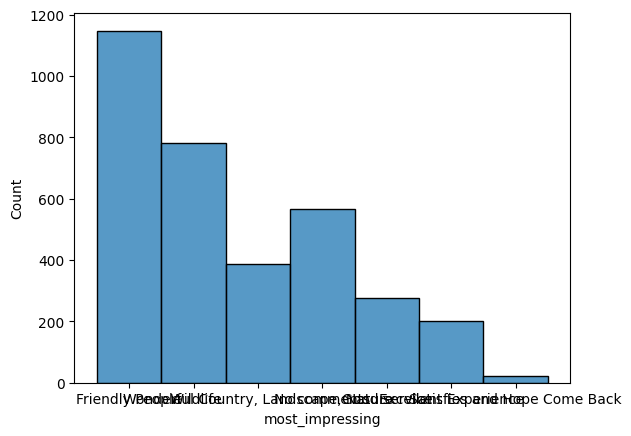

In [63]:
#most_impressing
sns.histplot(X_train.most_impressing)
plt.show()

In [67]:
X_train.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
3075,SOUTH AFRICA,25-44,NaN,0.0,1.0,Meetings and Conference,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,2.0,0.0,Credit Card,No,Friendly People
2915,KENYA,25-44,Spouse and Children,2.0,2.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,0.0,12.0,Cash,Yes,Friendly People
2304,POLAND,1-24,Spouse,1.0,1.0,Leisure and Holidays,Beach tourism,"Radio, TV, Web",Independent,No,...,No,No,No,No,No,3.0,6.0,Cash,Yes,Wildlife
1196,IRELAND,45-64,Friends/Relatives,0.0,2.0,Business,Wildlife tourism,"Radio, TV, Web",Independent,No,...,No,No,No,No,No,2.0,0.0,Credit Card,Yes,Friendly People
620,UNITED KINGDOM,45-64,NaN,1.0,0.0,Volunteering,Hunting tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,No,3.0,0.0,Cash,No,Friendly People


<Axes: >

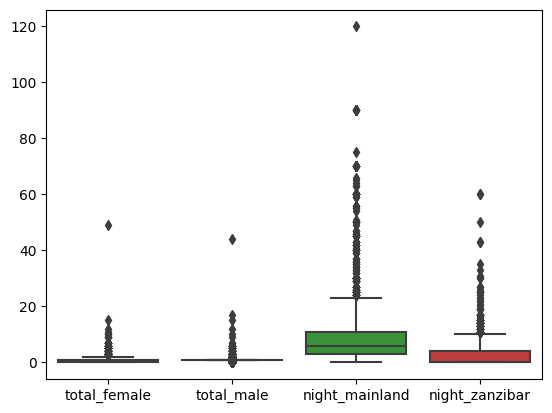

In [73]:
sns.boxplot(X_train)

<Axes: ylabel='night_zanzibar'>

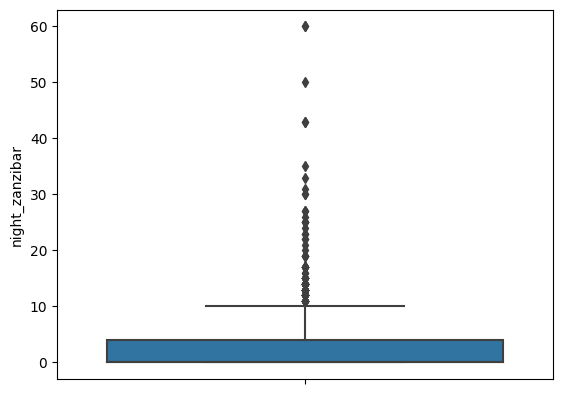

In [72]:

sns.boxplot(X_train, y ='night_zanzibar')

<Axes: ylabel='night_mainland'>

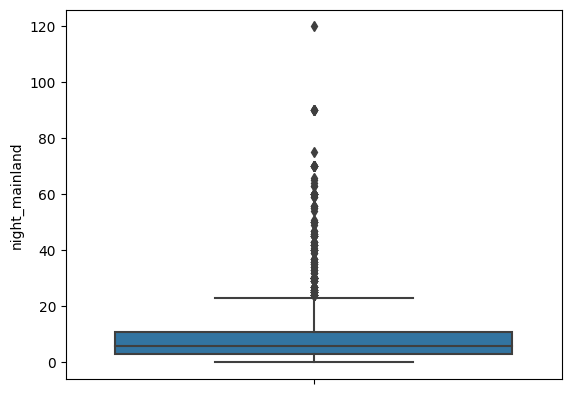

In [ ]:
sns.boxplot(X_train, y ='night_mainland')


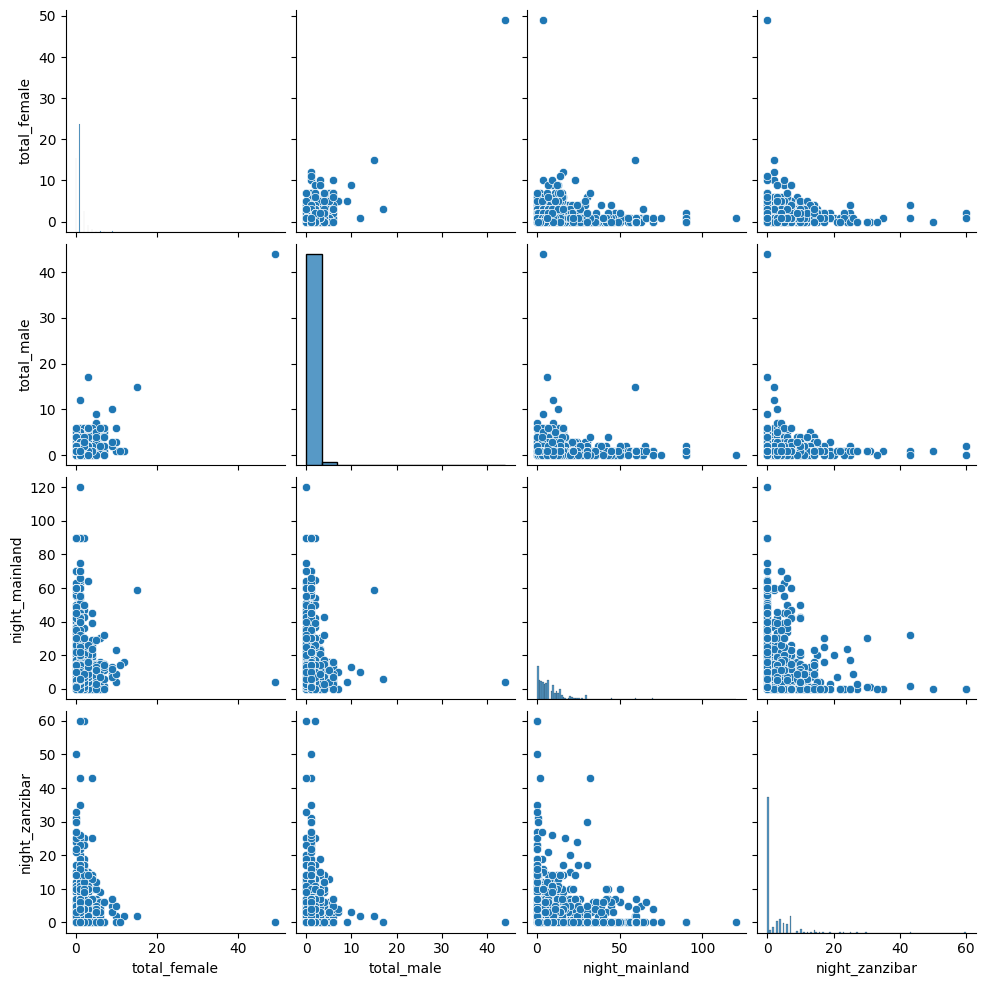

In [66]:
sns.pairplot(X_train)

In [21]:
X_train.columns

Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'most_impressing'],
      dtype='object')

In [22]:
#Encoding
col_encode = ['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement','payment_mode', 'most_impressing']
col_map = ['package_transport_int', 'package_accomodation', 'package_food','package_transport_tz', 'package_sightseeing', 'package_guided_tour','package_insurance','first_trip_tz',]


In [23]:
# Replace 'yes' with 1 and 'no' with 0 in specified columns 
X_train[col_map] = X_train[col_map].replace({'Yes': 1, 'No': 0}) 
print(X_train)

                       country age_group          travel_with  total_female   
3075              SOUTH AFRICA     25-44                  NaN           0.0  \
2915                     KENYA     25-44  Spouse and Children           2.0   
2304                    POLAND      1-24               Spouse           1.0   
1196                   IRELAND     45-64    Friends/Relatives           0.0   
620             UNITED KINGDOM     45-64                  NaN           1.0   
...                        ...       ...                  ...           ...   
4426                    UGANDA     25-44                  NaN           0.0   
466             UNITED KINGDOM     45-64    Friends/Relatives           6.0   
3092                     KENYA     45-64                  NaN           0.0   
3772                  ZIMBABWE     25-44                Alone           0.0   
860   UNITED STATES OF AMERICA       65+               Spouse           1.0   

      total_male                         purpose   

In [24]:
X_train.corr(numeric_only = True)

,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
total_female,1.000000,0.514951,0.170134,0.178035,0.159722,0.159895,0.133845,0.130751,0.102355,0.028757,0.141290,0.152758
total_male,0.514951,1.000000,0.092182,0.036991,0.021783,0.031980,0.028054,0.017208,0.038437,-0.041586,0.048440,0.026907
package_transport_int,0.170134,0.092182,1.000000,0.670450,0.615050,0.588055,0.415581,0.416156,0.474883,-0.115652,0.228680,0.261320
package_accomodation,0.178035,0.036991,0.670450,1.000000,0.926280,0.856207,0.698337,0.724267,0.445421,-0.073064,0.135713,0.400472
package_food,0.159722,0.021783,0.615050,0.926280,1.000000,0.826437,0.662631,0.701006,0.446895,-0.082787,0.122729,0.383350
package_transport_tz,0.159895,0.031980,0.588055,0.856207,0.826437,1.000000,0.689453,0.698002,0.443974,-0.058969,0.101221,0.374713
package_sightseeing,0.133845,0.028054,0.415581,0.698337,0.662631,0.689453,1.000000,0.788207,0.385619,0.014182,-0.009303,0.324582
package_guided_tour,0.130751,0.017208,0.416156,0.724267,0.701006,0.698002,0.788207,1.000000,0.432193,-0.007543,0.000886,0.350292
package_insurance,0.102355,0.038437,0.474883,0.445421,0.446895,0.443974,0.385619,0.432193,1.000000,-0.067193,0.120316,0.215047
night_mainland,0.028757,-0.041586,-0.115652,-0.073064,-0.082787,-0.058969,0.014182,-0.007543,-0.067193,1.000000,-0.115445,-0.003543


In [34]:
#OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

In [35]:
#Encoding
col_encode = ['country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement','payment_mode', 'most_impressing']
X_train[col_encode].nunique() 
ohe.fit(X_train[col_encode]) 
t = ohe.transform(X_train[col_encode])


In [36]:
ohe.get_feature_names_out() 

array(['country_ANGOLA', 'country_ARGENTINA', 'country_AUSTRALIA',
       'country_AUSTRIA', 'country_BELGIUM', 'country_BERMUDA',
       'country_BRAZIL', 'country_BURGARIA', 'country_BURUNDI',
       'country_CANADA', 'country_CAPE VERDE', 'country_CHILE',
       'country_CHINA', 'country_COLOMBIA', 'country_COMORO',
       'country_CONGO', 'country_COSTARICA', 'country_CROATIA',
       'country_CYPRUS', 'country_CZECH REPUBLIC', 'country_DENMARK',
       'country_DJIBOUT', 'country_DOMINICA', 'country_DRC',
       'country_EGYPT', 'country_ESTONIA', 'country_ETHIOPIA',
       'country_FINLAND', 'country_FRANCE', 'country_GEORGIA',
       'country_GERMANY', 'country_GHANA', 'country_GREECE',
       'country_HUNGARY', 'country_INDIA', 'country_INDONESIA',
       'country_IRAN', 'country_IRAQ', 'country_IRELAND',
       'country_ISRAEL', 'country_ITALY', 'country_IVORY COAST',
       'country_JAPAN', 'country_KENYA', 'country_KOREA',
       'country_KUWAIT', 'country_LATVIA', 'country_

In [37]:
X_train.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
3075,SOUTH AFRICA,25-44,NaN,0.0,1.0,Meetings and Conference,Wildlife tourism,"Friends, relatives",Independent,0,...,0,0,0,0,0,2.0,0.0,Credit Card,0,Friendly People
2915,KENYA,25-44,Spouse and Children,2.0,2.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,0,...,0,0,0,0,0,0.0,12.0,Cash,1,Friendly People
2304,POLAND,1-24,Spouse,1.0,1.0,Leisure and Holidays,Beach tourism,"Radio, TV, Web",Independent,0,...,0,0,0,0,0,3.0,6.0,Cash,1,Wildlife
1196,IRELAND,45-64,Friends/Relatives,0.0,2.0,Business,Wildlife tourism,"Radio, TV, Web",Independent,0,...,0,0,0,0,0,2.0,0.0,Credit Card,1,Friendly People
620,UNITED KINGDOM,45-64,NaN,1.0,0.0,Volunteering,Hunting tourism,"Travel, agent, tour operator",Independent,0,...,0,0,0,0,0,3.0,0.0,Cash,0,Friendly People


In [ ]:
# Purpose: It generates the new feature names created during one-hot encoding, reflecting the original categorical feature and its unique values.
ohe.get_feature_names_out() 
x_train_encode = pd.DataFrame(t, columns= ohe.get_feature_names_out())
x_train_encode.head()
# introduced into the frame
X_train = pd.concat([X_train.reset_index(drop=True), x_train_encode], axis=1)
X_train.drop(columns=col_encode,inplace=True)


In [43]:
X_train.head()
X_train.shape

(3606, 153)